<a href="https://colab.research.google.com/github/a22106/ImageClassification/blob/main/ComputerVision/Sec4_ImgSeg_Contours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. using find Countours
2. Drawing Contours
3. Hierachy Contours
4. Contouring Modes (Simple vs Approx)

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def imshow(title = "", image = None, size = 10):
  w, h = image.shape[0], image.shape[1]
  aspect_ratio = w/h
  plt.figure(figsize = (size * aspect_ratio, size))
  plt.title(title)
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.show()

!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
!unzip -qq images.zip


--2022-06-26 14:17:04--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 3.5.244.121
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|3.5.244.121|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29586716 (28M) [application/zip]
Saving to: ‘images.zip.1’

images.zip.1        100%[===================>]  28.22M  12.3MB/s    in 2.3s    

2022-06-26 14:17:07 (12.3 MB/s) - ‘images.zip.1’ saved [29586716/29586716]

replace images/castara.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


### What are Contours?
Contours are continuous lines or curves that bound or cover the full boundary of an object</br>
한국어로 등고선. 같은 값을 연결한 선을 뜻함</br>
이미지에서는 동일한 색, 동일한 값을 가진 영역을 연결한 선

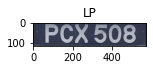

In [ ]:
image = cv2.imread("images/LP.jpg")
imshow("LP", image)

#### **Applying cv2.findContours()**

```cv2.findContours(image, Retrieval Mode, Approximation Method)```

**Retrieval Modes**
- **RETR_LIST** - Retrieves all the contours, but doesn't create any parent-child relationship. Parents and kids are equal under this rule, and they are just contours. ie they all belongs to same hierarchy level.
- **RETR_EXTERNAL** - eturns only extreme outer flags. All child contours are left behind.
- **RETR_CCOMP** - This flag retrieves all the contours and arranges them to a 2-level hierarchy. ie external contours of the object (ie its boundary) are placed in hierarchy-1. And the contours of holes inside object (if any) is placed in hierarchy-2. If any object inside it, its contour is placed again in hierarchy-1 only. And its hole in hierarchy-2 and so on.
- **RETR_TREE** -  It retrieves all the contours and creates a full family hierarchy list. 

**Approximation Method Options**
- cv2.CHAIN_APPROX_NONE – Stores all the points along the line(inefficient!)
- cv2.CHAIN_APPROX_SIMPLE – Stores the end points of each line

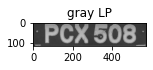

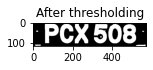

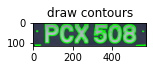

number of contours found = 15


In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
imshow("gray LP", gray)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) # threshold returns threshold that was used and thresholded image
imshow('After thresholding', th2)

# finding contours
# use a copy of my image e.g. edged.copy(), since findContours alters the image
# findcontours(image, mode, method)
# hierarchy: 이미지에는 여러 contours가 있으며 그 사이에는 상관관계가 있고, 그 관계를 hierarchy라고 함
# hierarchy를 통해 parents, child, 또는 동등한 상관관계에서 이웃 파악 가능
# Contour 내부에 다른 contour가 있다면 안쪽의 contour를 자식 계층이라 함
# RETR_LIST: 모든 contour를 찾지만 상관관계 고려하지 않음
# RETR_TREE: 모든 hierarchy의 상관관계를 나타냄
# RETR_EXTERNAL: 가장 바깥쪽(최상위 부모계층)이 있는 Contours만을 반환함. RETR_TREE mode로 반환된 hierarchy에서 3번째 index가 -1인 Contours만은 반환함
# RETR_CCOMP: 부모/자식 관계를 2단계로 표현함 독립적으로 떨어져있는 Contours는 부모/자식 관계가 따로 존재하지 않으므로 해당 Contours의 hierarchy의 2, 3번쨰 index는 -1d이지만, 안에 구멍이 있는 contours는 경우가 다름
# Chain_approx_none: 경계선 모두를 저장하는 방식
# chain_approx_simple: 모서리 포인트만 저장
contours, hierarchy, = cv2.findContours(th2, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE) 

# Draw all contours, note this 
# Use -1 as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0, 255, 0), thickness = 2)
imshow("draw contours", image)

print("number of contours found = " + str(len(contours)))